# Time series forecasting project


In [1]:
# Handle imports up-front
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA


## 1. Data Loading

In [2]:
raw_data_df=sns.load_dataset("flights")

In [3]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [4]:
raw_data_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Encode date feature

In [5]:
# Make a copy of the raw data to work with
timeseries_df=raw_data_df.copy()

# Extract the string month to a datetime object feature
timeseries_df['month']=pd.to_datetime(raw_data_df.month, format='%b').dt.month

# Use the month and year to create at 'date' datetime feature
timeseries_df['date']=pd.to_datetime(timeseries_df[['year', 'month']].assign(day=1))

# Set the datetime feature as the index
timeseries_df=timeseries_df.set_index('date')

# Keep only the passenger column
timeseries_df.drop(['year', 'month'], axis=1, inplace=True)

# Re-name 'passengers' to 'dependent_var' so we can easily swap datasets without making
# changes to the notebook
timeseries_df.rename(columns={'passengers': 'dependent_var'}, inplace=True)

# Check the result
timeseries_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   dependent_var  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## EDA

### 2.1 Baseline model performance

Mean Squared Error: 2091.80


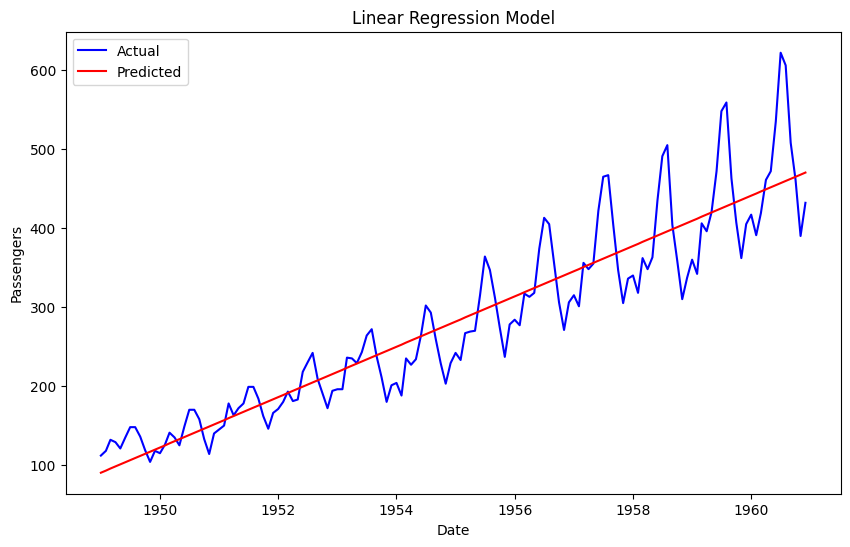

In [6]:
# Create a numeric range for x values
timeseries_df['index'] = np.arange(len(timeseries_df))

# Define X and y
X = timeseries_df[['index']]
y = timeseries_df['dependent_var']

# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Make predictions
y_pred = linear_model.predict(X)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(timeseries_df.index, y, label='Actual', color='blue')
plt.plot(timeseries_df.index, y_pred, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


### 2.2. Missing, and/or extreme value

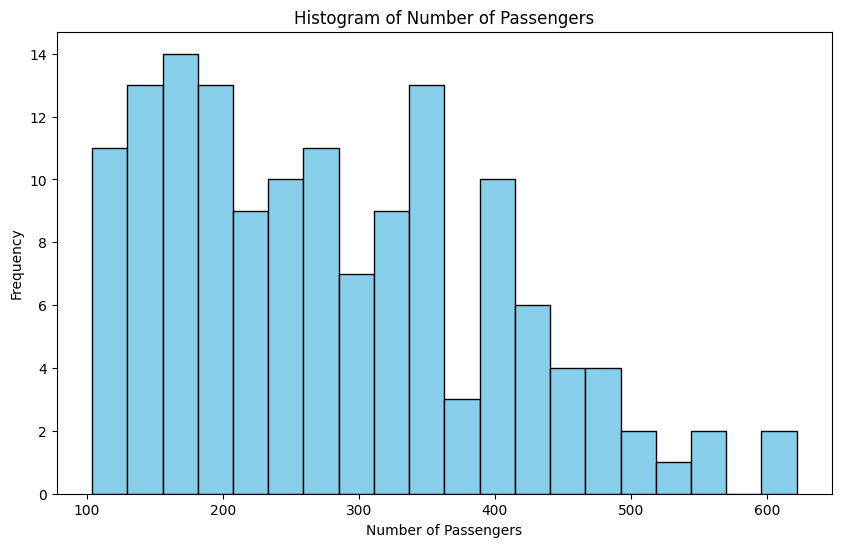

In [7]:
# Plot a histogram of the dependent_var (number of passengers)
plt.figure(figsize=(10, 6))
plt.hist(timeseries_df['dependent_var'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Passengers')
plt.show()


### Timeseries analysis

### 2.3.1. Plot the time-series

Mean Squared Error: 2091.80
Time differences: 
date
31 days    83
30 days    48
28 days     9
29 days     3
Name: count, dtype: int64


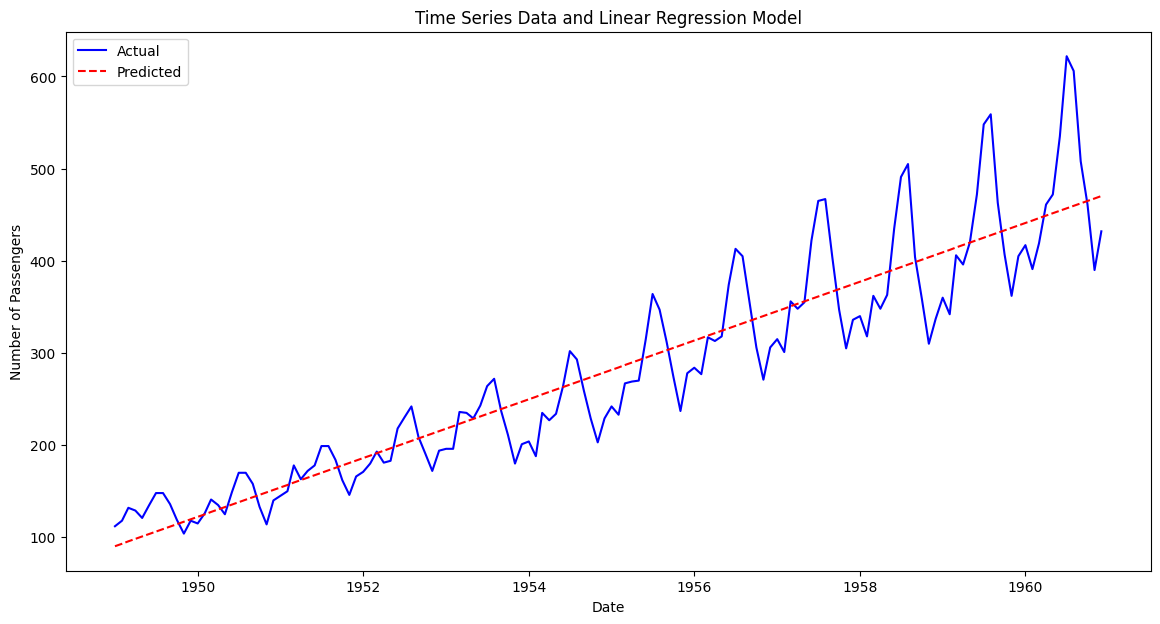

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data
raw_data_df = sns.load_dataset("flights")

# Make a copy of the raw data to work with
timeseries_df = raw_data_df.copy()

# Extract the string month to a datetime object feature
timeseries_df['month'] = pd.to_datetime(raw_data_df.month, format='%b').dt.month

# Use the month and year to create a 'date' datetime feature
timeseries_df['date'] = pd.to_datetime(timeseries_df[['year', 'month']].assign(day=1))

# Set the datetime feature as the index
timeseries_df = timeseries_df.set_index('date')

# Keep only the passenger column
timeseries_df.drop(['year', 'month'], axis=1, inplace=True)

# Re-name 'passengers' to 'dependent_var' so we can easily swap datasets without making changes to the notebook
timeseries_df.rename(columns={'passengers': 'dependent_var'}, inplace=True)

# Create a numeric range for x values
timeseries_df['index'] = np.arange(len(timeseries_df))

# Define X and y
X = timeseries_df[['index']]
y = timeseries_df['dependent_var']

# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Make predictions
y_pred = linear_model.predict(X)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Check if the time axis is regular
time_difference = timeseries_df.index.to_series().diff().dropna()
print(f"Time differences: \n{time_difference.value_counts()}")

# Plot the data over time and include the linear regression from above
plt.figure(figsize=(14, 7))
plt.plot(timeseries_df.index, y, label='Actual', color='blue')
plt.plot(timeseries_df.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Time Series Data and Linear Regression Model')
plt.legend()
plt.show()


### Missing Timepoints

Missing dates after resampling:
DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', name='date', length=144, freq='ME')


/tmp/ipykernel_24725/1861236348.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_df = timeseries_df.resample('M').asfreq()


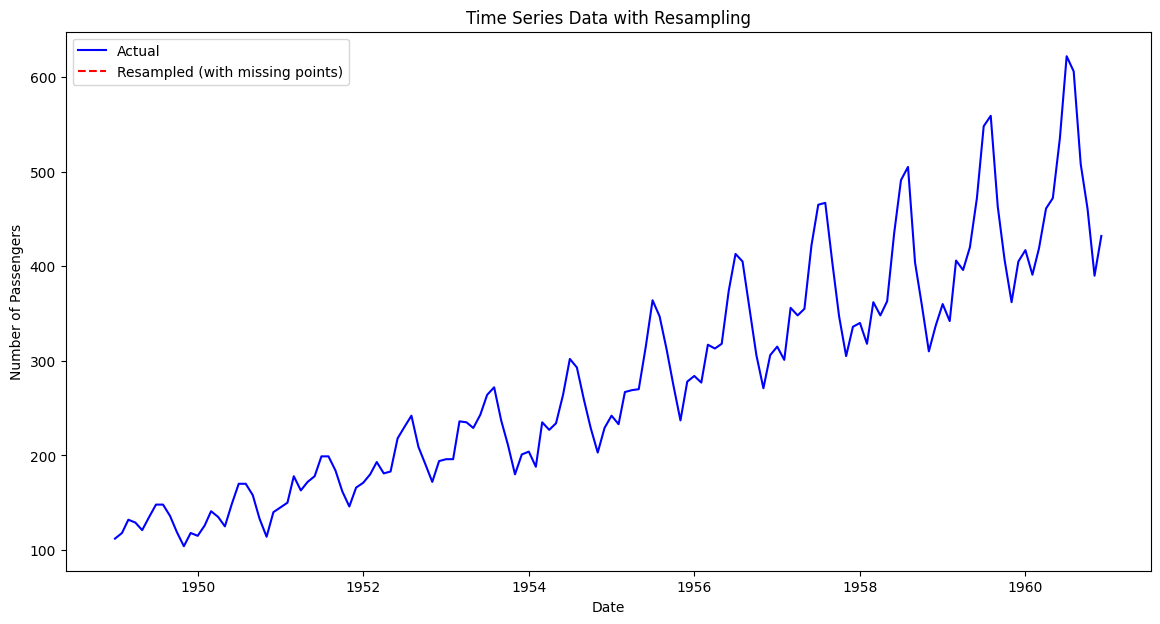

In [21]:
# Resample the time series data to a monthly frequency to ensure regularity
resampled_df = timeseries_df.resample('M').asfreq()

# Check for any missing data points after resampling
missing_dates = resampled_df[resampled_df['dependent_var'].isna()]
print(f"Missing dates after resampling:\n{missing_dates.index}")

# Plot the time series to include any identified missing points
plt.figure(figsize=(14, 7))
plt.plot(timeseries_df.index, timeseries_df['dependent_var'], label='Actual', color='blue')
plt.plot(resampled_df.index, resampled_df['dependent_var'], label='Resampled (with missing points)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Time Series Data with Resampling')
plt.legend()
plt.show()




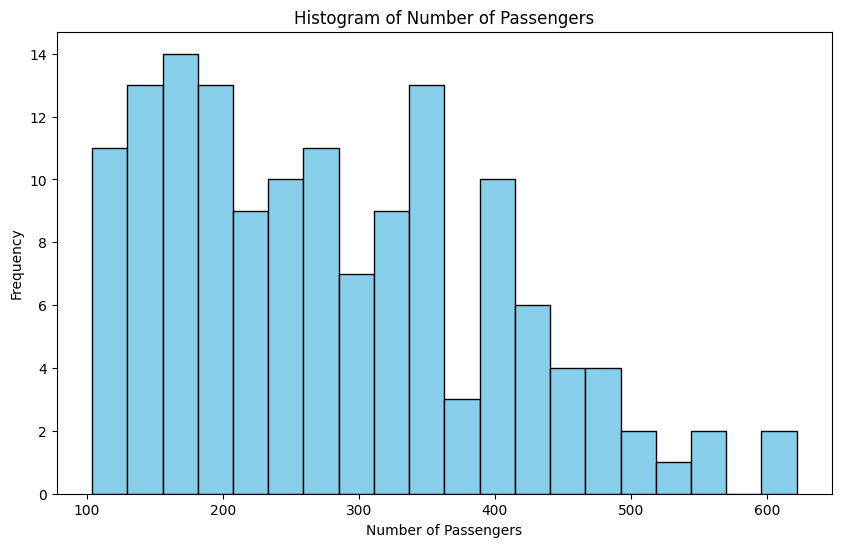

In [23]:


# Plot histogram of the dependent_var (number of passengers)
plt.figure(figsize=(10, 6))
plt.hist(timeseries_df['dependent_var'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Passengers')
plt.show()




### Stationary

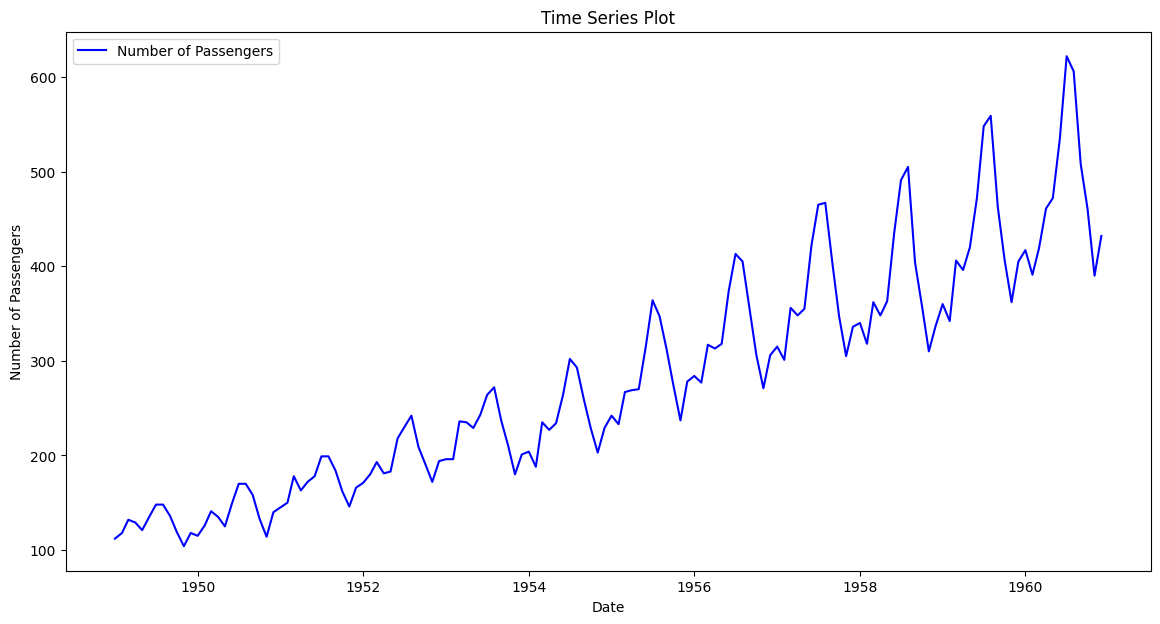

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Value 1%: -3.4816817173418295
Critical Value 5%: -2.8840418343195267
Critical Value 10%: -2.578770059171598
The data is not stationary (fail to reject the null hypothesis).


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(timeseries_df.index, timeseries_df['dependent_var'], label='Number of Passengers', color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Time Series Plot')
plt.legend()
plt.show()

# Perform the Augmented Dickey-Fuller test
result = adfuller(timeseries_df['dependent_var'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value {key}: {value}')

# Interpretation of the result
if result[1] < 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is not stationary (fail to reject the null hypothesis).")


### 2.3.4. Seasonality

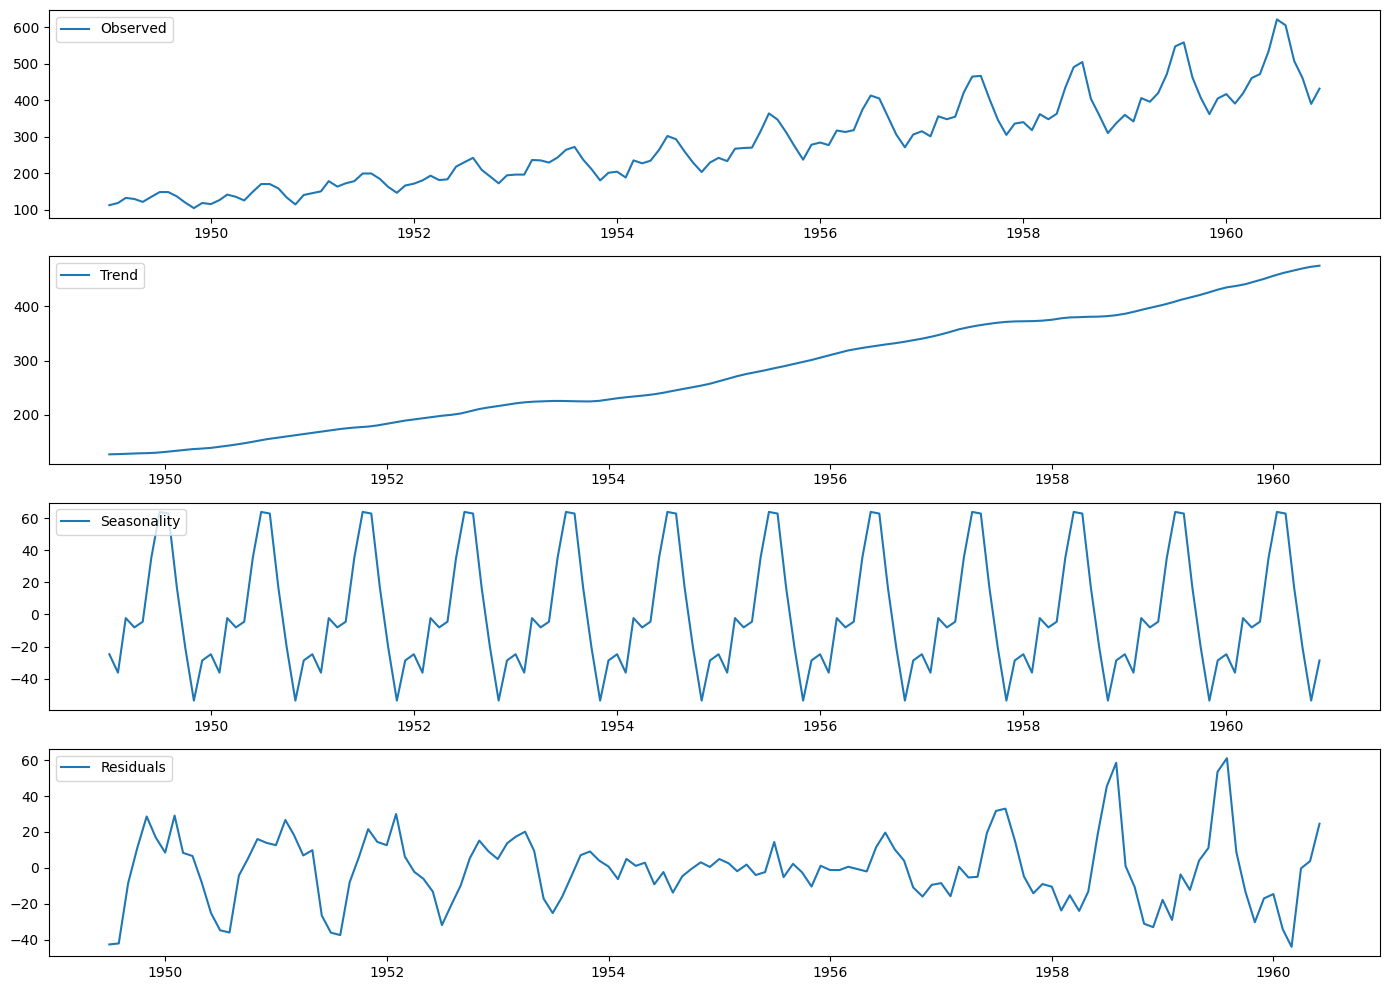

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
raw_data_df = sns.load_dataset("flights")

# Make a copy of the raw data to work with
timeseries_df = raw_data_df.copy()

# Extract the string month to a datetime object feature
timeseries_df['month'] = pd.to_datetime(raw_data_df.month, format='%b').dt.month

# Use the month and year to create a 'date' datetime feature
timeseries_df['date'] = pd.to_datetime(timeseries_df[['year', 'month']].assign(day=1))

# Set the datetime feature as the index
timeseries_df = timeseries_df.set_index('date')

# Keep only the passenger column
timeseries_df.drop(['year', 'month'], axis=1, inplace=True)

# Re-name 'passengers' to 'dependent_var' so we can easily swap datasets without making changes to the notebook
timeseries_df.rename(columns={'passengers': 'dependent_var'}, inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(timeseries_df['dependent_var'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


### Model Training

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1020.048, Time=0.85 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.12 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1019.935, Time=0.60 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1019.290, Time=0.18 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1019.546, Time=0.55 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1024.160, Time=0.10 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1017.847, Time=0.22 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1017.914, Time=0.47 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1018.359, Time=0.40 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1018.248, Time=0.80 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1022.393, Time=0.05 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1022.393, Time=0.04 sec
 ARIMA(3,1,1)(0,1,0

/tmp/ipykernel_24725/4245503644.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(timeseries_df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')


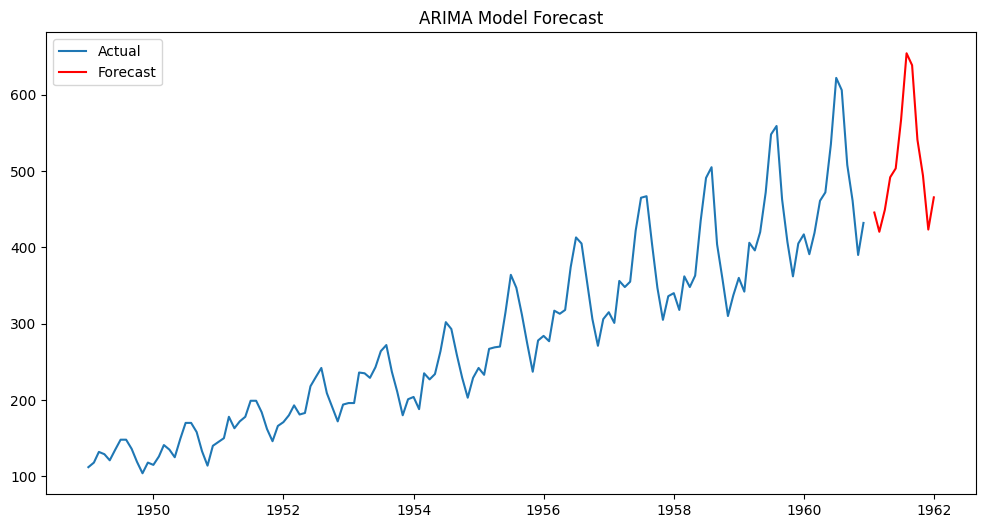

In [15]:
from pmdarima import auto_arima
# Fit the ARIMA model
model_arima = auto_arima(timeseries_df['dependent_var'], seasonal=True, m=12, trace=True, suppress_warnings=True)
# Print the model summary
print(model_arima.summary())
# Forecast the next 12 months (1 year)
forecast = model_arima.predict(n_periods=12)
# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(timeseries_df.index, timeseries_df['dependent_var'], label='Actual')
plt.plot(pd.date_range(timeseries_df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')
plt.legend(loc='best')
plt.title('ARIMA Model Forecast')
plt.show()

### Model Evaluation 

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Load the data
raw_data_df = sns.load_dataset("flights")

# Make a copy of the raw data to work with
timeseries_df = raw_data_df.copy()

# Extract the string month to a datetime object feature
timeseries_df['month'] = pd.to_datetime(raw_data_df.month, format='%b').dt.month

# Use the month and year to create a 'date' datetime feature
timeseries_df['date'] = pd.to_datetime(timeseries_df[['year', 'month']].assign(day=1))

# Set the datetime feature as the index
timeseries_df = timeseries_df.set_index('date')

# Keep only the passenger column
timeseries_df.drop(['year', 'month'], axis=1, inplace=True)

# Re-name 'passengers' to 'dependent_var' so we can easily swap datasets without making changes to the notebook
timeseries_df.rename(columns={'passengers': 'dependent_var'}, inplace=True)

# Perform TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store results
train_scores = []
test_scores = []

for train_index, test_index in tscv.split(timeseries_df):
    train, test = timeseries_df.iloc[train_index], timeseries_df.iloc[test_index]
    
    # Fit the ARIMA model
    model_arima = auto_arima(train['dependent_var'], seasonal=True, m=12, D=0, trace=False, suppress_warnings=True)
    
    # Forecast the test period
    forecast = model_arima.predict(n_periods=len(test))
    
    # Evaluate the model
    train_mse = mean_squared_error(train['dependent_var'], model_arima.predict_in_sample())
    test_mse = mean_squared_error(test['dependent_var'], forecast)
    
    train_scores.append(train_mse)
    test_scores.append(test_mse)
    
    print(f'Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Calculate average MSE for train and test
avg_train_mse = sum(train_scores) / len(train_scores)
avg_test_mse = sum(test_scores) / len(test_scores)

print(f'\nAverage Train MSE: {avg_train_mse:.4f}')
print(f'Average Test MSE: {avg_test_mse:.4f}')


Train MSE: 78.0064, Test MSE: 2061.7775
Train MSE: 349.0780, Test MSE: 253.5715
Train MSE: 260.3674, Test MSE: 1263.6182
Train MSE: 224.7666, Test MSE: 569.1196
Train MSE: 209.6854, Test MSE: 4006.8877

Average Train MSE: 224.3808
Average Test MSE: 1630.9949
